In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize\

In [4]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)


def polynomial_p4(x0, x1, x2, x3, s1, s2, s3, u):                   
    xu = -(u-s1)*(u-s2)*(u-s3)*x0/s1/s2/s3 + (u)*(u-s2)*(u-s3)*x1/s1/(s1-s2)/(s1-s3) 
    xu += (u)*(u-s1)*(u-s3)*x2/s2/(s2-s1)/(s2-s3)  + (u)*(u-s1)*(u-s2)*x3/s3/(s3-s1)/(s3-s2)
    return xu;

def tangent_p4(x0, x1, x2, x3, s1, s2, s3, u):                   
    t = -( (u-s2)*(u-s3) + (u-s1)*(u-s3) + (u-s1)*(u-s2) )*x0/s1/s2/s3
    t += ( (u-s2)*(u-s3) + (u)*(u-s3) + (u)*(u-s2) )*x1/s1/(s1-s2)/(s1-s3) 
    t += ( (u-s1)*(u-s3) + (u)*(u-s3) + (u)*(u-s1) )*x2/s2/(s2-s1)/(s2-s3)
    t += ( (u-s1)*(u-s2) + (u)*(u-s2) + (u)*(u-s1) )*x3/s3/(s3-s1)/(s3-s2)
    l = norm(t);
    return (t/l)

def tangent5(a, b, c, d, e):
    s1 = norm(b-a);
    s2 = norm(c-b) + s1;
    s3 = norm(d-c) + s2;
    s4 = norm(e-d) + s3;
    u = s2;
    #define tangent_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)\
    c0 = ((u-s2)*(u-s3)*(u-s4) + (u-s1)*(u-s3)*(u-s4) + (u-s1)*(u-s2)*(u-s4) + (u-s1)*(u-s2)*(u-s3))/s1/s2/s3/s4;
    c1 = ((u-s2)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s3))/s1/(s1-s2)/(s1-s3)/(s1-s4);
    c2 = ((u-s1)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s3))/s2/(s2-s1)/(s2-s3)/(s2-s4);
    c3 = ((u-s1)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s2))/s3/(s3-s1)/(s3-s2)/(s3-s4);
    c4 = ((u-s1)*(u-s2)*(u-s3) + (u)*(u-s2)*(u-s3) + (u)*(u-s1)*(u-s3) + (u)*(u-s1)*(u-s2))/s4/(s4-s1)/(s4-s2)/(s4-s3);
    t = a*c0 + b*c1 + c*c2 + d*c3 + e*c4;
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

# def kappa5(a,b,c,d,e):
#     tb = tangent(a,b,c);
#     tc = tangent(b,c,d);
#     td = tangent(c,d,e);
#     xl = Hermite(b,c,tb,tc,0.5);
#     xr = Hermite(c,d,tc,td,0.5);
#     tl = dHermite(b,c,tb,tc,0.5);
#     tr = dHermite(c,d,tc,td,0.5);
#     return (kappa(tl, tr, xl, xr))

def kappa5(a,b,c,d,e):
    s1 = norm(b-a); s2 = s1 + norm(c-b); s3 = s2 + norm(d-c); s = s1 + 0.5*norm(c-b);
    xl = polynomial_p4(a,b,c,d,s1,s2,s3,s);
    tl = tangent_p4(a,b,c,d,s1,s2,s3,s);
    s1 = norm(c-b); s2 = s1 + norm(d-c); s3 = s2 + norm(e-d); s = s1 + 0.5*norm(d-c);
    xr = polynomial_p4(b,c,d,e,s1,s2,s3,s);
    tr = tangent_p4(b,c,d,e,s1,s2,s3,s);
    return (kappa(tl, tr, xl, xr))

def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [5]:
def boundary(x,y):
    xb = []
    yb = []
    for i_ in range(5):
        i = 5-i_;
        xb.append(-x[i])
        yb.append(y[i])
    l, = np.shape(x)
    for i in range(l):
        xb.append(x[i])
        yb.append(y[i])
    for i_ in range(5):
        i = (l-2)-i_
        xb.append(x[i])
        yb.append(-y[i])
    return xb,yb
def boundary_symm(s):
    sb = []
    for i_ in range(5):
        i = 5-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-2)-i_
        sb.append(s[i])
    return sb
def boundary_kappa(s):
    sb = []
    for i_ in range(5):
        i = 4-i_;
        sb.append(s[i])
    l, = np.shape(s)
    for i in range(l):
        sb.append(s[i])
    for i_ in range(5):
        i = (l-1)-i_
        sb.append(s[i])
    return sb

def kappa_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa5(a,b,c,d,e))
    return k;

def kappa_centroid_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 11;
    thetac = [];k = [];
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        xc = centroid(c,d)
        th = np.arctan2(xc[1], xc[0])
        thetac.append(th)
        k.append(kappa4(b,c,d,e))
    return thetac,k;

def kappa_interpolation(a,b,c,d,e, kp, kq, kr, ks):
    d1 = norm(b-a); d2 = norm(c-b); d3 = norm(d-c); d4 = norm(e-d);
    s1 = 0.5*(d1+d2); s2 = s1 + 0.5*(d2+d3); s3 = s2 + 0.5*(d3+d4); s = 0.5*d1+d2;
    kc = polynomial_p4(kp, kq, kr, ks, s1, s2, s3, s)
    return kc;

def kappa_interpolation_vector(xb,yb):
    thetac, kc = kappa_centroid_vector(xb,yb);
    kc = boundary_kappa(kc);
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        k.append(kappa_interpolation(a,b,c,d,e,kc[i-2],kc[i-1],kc[i],kc[i+1]))
    return k;

def dk_ds_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    dkds = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tb = tangent(a,b,c);
        tc = tangent(b,c,d);
        td = tangent(c,d,e);
        xl = Hermite(b,c,tb,tc,0.5);
        xr = Hermite(c,d,tc,td,0.5);
        kl = kappa4(a,b,c,d)
        kr = kappa4(b,c,d,e)
        val = (kr-kl)/(norm(xr-c)+norm(c-xl));
        dkds.append(val)
    return dkds;

def ddk_dsds7(z,a,b,c,d,e,f):
    tb = tangent5(z,a,b,c,d);
    tc = tangent5(a,b,c,d,e);
    td = tangent5(b,c,d,e,f);
    kl = kappa5(z,a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa5(b,c,d,e,f)
    dr = norm(b-c);
    dl = norm(c-d);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds5(a,b,c,d,e):
    kl = kappa4(a,b,c,d)
    kr = kappa4(b,c,d,e)
    km = kappa5(a,b,c,d,e)
    dr = 0.5*norm(b-c);
    dl = 0.5*norm(c-d);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    kl = kappa4(a,b,c,d)
    km = kappa5(a,b,c,d,e)
    kr = kappa4(b,c,d,e)
    dr = norm(xr-c);
    dl = norm(c-xl);
    val = ((kr-km)/dr - (km-kl)/dl)/(dl+dr);
    return val;

def ddk_dsds7_vector(xb,yb):
    l, = np.shape(xb);
    k = kappa_vector(xb,yb);
    k = boundary_symm(k);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        dr = norm(d-c); dl = norm(c-b);
        kb = k[i-1]; kc =k[i]; kd = k[i+1]
        val = ((kd-kc)/dr - (kc-kb)/dl)/(dl+dr)
        ddk_dsds.append(val)
    return ddk_dsds;


def ddk_dsds_vector(xb,yb):
    l, = np.shape(xb);
    k = kappa_interpolation_vector(xb,yb);
    k = boundary_symm(k);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        dr = norm(d-c); dl = norm(c-b);
        kb = k[i-1]; kc =k[i]; kd = k[i+1]
        val = ((kd-kc)/dr - (kc-kb)/dl)/(dl+dr)
        ddk_dsds.append(val)
    return ddk_dsds;



In [9]:
Radius  =  1.0
theta= []; xtheta = []; ytheta = [];
for j in range(5):
    #Initialising non equispaced points
    Npoints = 1+4*int(np.power(2,j+1) + 0.0000001);
    dth = 1/(Npoints-1.)
    th = 0.5*np.pi*np.arange(1., 2.000001, dth)
    pert = 0.2*dth*0.5*np.pi*np.random.normal(0,1,Npoints)
    pert[0] = 0.;  pert[Npoints-1] = 0.;
    th += pert;
    rad = Radius*(np.ones(np.shape(th)) + 0.001*np.random.normal(0,1,Npoints));
    theta.append(th);
    xtheta.append(rad*np.cos(th));
    ytheta.append(rad*np.sin(th));

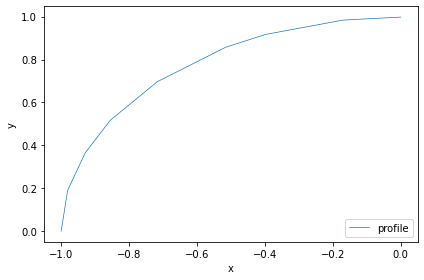

In [10]:
x = xtheta[0]
y = ytheta[0]
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "profile")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

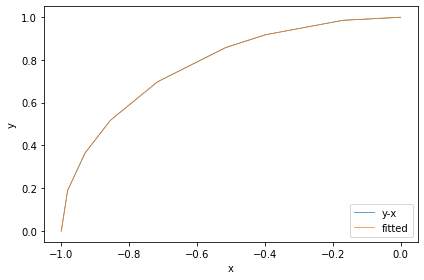

In [11]:
# cosine wave fitted to the damping wave profile
from scipy.optimize import leastsq
#parameters [guess_amp, guess_freq, guess_phase, guess_mean]
optimize_func = lambda par: np.power(x,2) + np.power(y,2) - np.power(par[0],2)
par0 = [np.max(y)]

est_radius = leastsq(optimize_func, par0)[0]

# recreate the fitted curve using the optimized parameters
xfit = est_radius*np.cos(theta[0])
yfit = est_radius*np.sin(theta[0])

fig, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(x, y, linewidth = 0.7, label = "y-x")
ax1.plot(xfit, yfit, linewidth = 0.7, label = "fitted")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

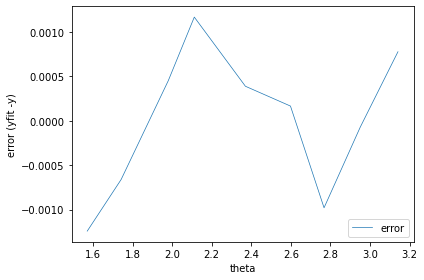

In [12]:
#error
def error (xf,yf):
    e = np.sqrt( np.power(xf,2) + np.power(yf,2)) - np.sqrt( np.power(xfit,2) + np.power(yfit,2))
    return e;

def error_kappa (k):
    e = k - (1/Radius)*np.ones(np.shape(k))
    return e;

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error (yfit -y)")
er = error(x,y)

ax1.plot(theta[0], er, linewidth = 0.7, label = "error")
ax1.legend(loc = "lower right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

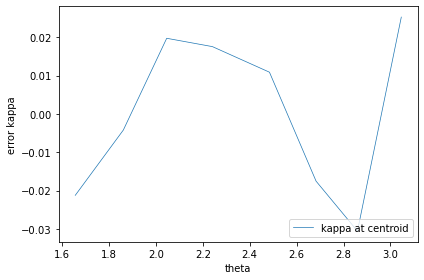

In [13]:
#Kappa at centroid

xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
thetac, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error kappa")
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

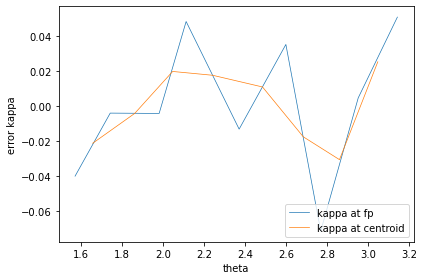

In [14]:

xb,yb = boundary(x,y)
kappav = kappa_vector(xb,yb)
thetac, kappavc = kappa_centroid_vector(xb,yb)

fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("error kappa")
ax1.plot(theta[0], error_kappa(kappav), linewidth = 0.7, label = "kappa at fp")
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

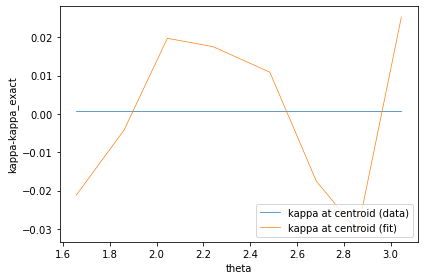

In [15]:
#centroid kappa
fig, ax1 = plt.subplots()
ax1.set_xlabel("theta")
ax1.set_ylabel("kappa-kappa_exact")
xb,yb = boundary(xfit,yfit)
thetac, kappavc = kappa_centroid_vector(xb,yb)
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid (data)")
xb,yb = boundary(x,y)
thetac, kappavc = kappa_centroid_vector(xb,yb)
ax1.plot(thetac, error_kappa(kappavc), linewidth = 0.7, label = "kappa at centroid (fit)")

xb,yb = boundary(xfit,yfit)
kappav_fit = kappa_vector(xb,yb)

#ax1.set_xlim(left=0.45, right=0.55);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [16]:
#tangent accuracy with grid spacing (3 point tangent)
def error_tangent(x,y):
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        tc = tangent(b,c,d)
        err.append(np.dot(c,tc))
    return err;
#tangent accuracy with grid spacing (5 point tangent)
def error_tangent5(x,y):
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        tc = tangent5(a,b,c,d,e)
        err.append(np.dot(c,tc))
    return err;

def tangent5_(a, b, c, d, e):
    s0 = np.arctan2(a[1], -a[0])
    s1 = np.arctan2(b[1], -b[0])-s0
    s2 = np.arctan2(c[1], -c[0])-s0
    s3 = np.arctan2(d[1], -d[0])-s0
    s4 = np.arctan2(e[1], -e[0])-s0
    u = s2;
    #define tangent_p5(x0, x1, x2, x3, x4, s1, s2, s3, s4, u)\
    c0 = ((u-s2)*(u-s3)*(u-s4) + (u-s1)*(u-s3)*(u-s4) + (u-s1)*(u-s2)*(u-s4) + (u-s1)*(u-s2)*(u-s3))/s1/s2/s3/s4;
    c1 = ((u-s2)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s3))/s1/(s1-s2)/(s1-s3)/(s1-s4);
    c2 = ((u-s1)*(u-s3)*(u-s4) + (u)*(u-s3)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s3))/s2/(s2-s1)/(s2-s3)/(s2-s4);
    c3 = ((u-s1)*(u-s2)*(u-s4) + (u)*(u-s2)*(u-s4) + (u)*(u-s1)*(u-s4) + (u)*(u-s1)*(u-s2))/s3/(s3-s1)/(s3-s2)/(s3-s4);
    c4 = ((u-s1)*(u-s2)*(u-s3) + (u)*(u-s2)*(u-s3) + (u)*(u-s1)*(u-s3) + (u)*(u-s1)*(u-s2))/s4/(s4-s1)/(s4-s2)/(s4-s3);
    t = a*c0 + b*c1 + c*c2 + d*c3 + e*c4;
    l = norm(t);
    return (t/l)

def dLagrangian(a, b, c, d, e):
    yt = np.array([a,b,c,d,e]);
    s0 = np.arctan2(a[1], -a[0])
    s1 = np.arctan2(b[1], -b[0])-s0
    s2 = np.arctan2(c[1], -c[0])-s0
    s3 = np.arctan2(d[1], -d[0])-s0
    s4 = np.arctan2(e[1], -e[0])-s0
    s = s2;
    t = np.array([0.,s1,s2,s3,s4]);
    dd = np.zeros(np.shape(a))
    for j in range(5):
        sum0 = 0;
        for i in range(5):
            if i!=j:
                div = 1.0/(Radius*(t[j]-t[i]));
                for m in range(5):
                    if((m!=i) and (m!=j)):
                        div  *= (s-t[m])/(t[j]-t[m]);
                sum0 += div;
        dd += sum0*yt[j]         
    return (dd)

def ddLagrangian(a, b, c, d, e):
    yt = np.array([a,b,c,d,e]);
    s0 = np.arctan2(a[1], -a[0])
    s1 = np.arctan2(b[1], -b[0])-s0
    s2 = np.arctan2(c[1], -c[0])-s0
    s3 = np.arctan2(d[1], -d[0])-s0
    s4 = np.arctan2(e[1], -e[0])-s0
    s = s2;
    t = np.array([0,s1,s2,s3,s4]);
    dd = np.zeros(np.shape(a))
    for j in range(5):
        sum0 = 0;
        for i in range(5):
            if i!=j:
                div = 1.0/(Radius*(t[j]-t[i]));
                sum1 = 0.
                for m in range(5):
                    if((m!=i) and (m!=j)):
                        div2 = 1.0/(Radius*(t[j]-t[m]));
                        for l in range(5):
                            if((l!=i)and (l!=j) and (l!=m)):
                                div2  *= (s-t[l])/(t[j]-t[l]);
                        sum1 += div2;
                sum0 += sum1*div;
        dd += sum0*yt[j]         
    return (dd)

def error_tangent5_(x,y):
    xb,yb = boundary(x,y)
    l, = np.shape(xb);
    l = l - 10;
    err = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        t = dLagrangian(a,b,c,d,e)
        tc = t/norm(t)
        #tc = tangent5_(a,b,c,d,e)
        err.append(np.dot(c,tc))
    return err;


def kappa_theta_vector(xb,yb):
    l, = np.shape(xb);
    l = l - 10;
    k = []
    for i_ in range(l):
        i = i_ + 5;
        a = np.array([xb[i-2],yb[i-2]]);
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        e = np.array([xb[i+2],yb[i+2]]);
        t = dLagrangian(a,b,c,d,e)
        dt = ddLagrangian(a,b,c,d,e)
        kappa =  abs(t[1]*dt[0] - t[0]*dt[1])/np.power(t[0]*t[0]+t[1]*t[1], 1.5);
        k.append(kappa);
    return k;

# def kappa_theta2_vector(xb,yb):
#     l, = np.shape(xb);
#     l = l - 10;
#     k = []
#     for i_ in range(l):
#         i = i_ + 5;
#         z = np.array([xb[i-3],yb[i-3]]);
#         a = np.array([xb[i-2],yb[i-2]]);
#         b = np.array([xb[i-1],yb[i-1]]);
#         c = np.array([xb[i],yb[i]]);
#         d = np.array([xb[i+1],yb[i+1]]);
#         e = np.array([xb[i+2],yb[i+2]]);
#         f = np.array([xb[i+3],yb[i+3]]);
#         tb = dLagrangian(z,a,b,c,d); tb = tb/norm(tb);
#         tc = dLagrangian(a,b,c,d,e); tc = tc/norm(tc);
#         td = dLagrangian(b,c,d,e,f); td = td/norm(td);
#         xl = Hermite(b,c,tb,tc,0.5);
#         xr = Hermite(c,d,tc,td,0.5);
#         tl = dHermite(b,c,tb,tc,0.5);
#         tr = dHermite(c,d,tc,td,0.5);
#         k.append(kappa(tl, tr, xl, xr));
#     return k;
    
def ddk_dsds_theta_vector(xb,yb):
    l, = np.shape(xb);
    k = kappa_theta_vector(xb,yb);
    k = boundary_symm(k);
    l = l - 10;
    ddk_dsds = []
    for i_ in range(l):
        i = i_ + 5;
        b = np.array([xb[i-1],yb[i-1]]);
        c = np.array([xb[i],yb[i]]);
        d = np.array([xb[i+1],yb[i+1]]);
        s0 = np.arctan2(b[1], -b[0])
        s1 = np.arctan2(c[1], -c[0])
        s2 = np.arctan2(d[1], -d[0])
        dr = Radius*(s2-s1); dl = Radius*(s1-s0);
        kb = k[i-1]; kc =k[i]; kd = k[i+1]
        val = ((kd-kc)/dr - (kc-kb)/dl)/(dl+dr)
        ddk_dsds.append(val)
    return ddk_dsds;


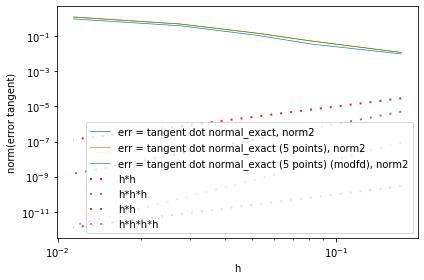

In [17]:
h = [];err2 = []; errinf = []
err2_ = []; errinf_ = []
err2__ = []; errinf__ = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    err = np.asarray(error_tangent(x,y))
    err2.append(norm(err))
    errinf.append(max(abs(err)))
    err = np.asarray(error_tangent5(x,y))
    err2_.append(norm(err))
    errinf_.append(max(abs(err)))
    err = np.asarray(error_tangent5_(x,y))
    err2__.append(norm(err))
    errinf__.append(max(abs(err)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error tangent)")
ax1.loglog(h,err2, linewidth = 0.7, label = "err = tangent dot normal_exact, norm2")
# ax1.loglog(h,errinf, linewidth = 0.7, label = "err = tangent dot normal_exact, norminf")
ax1.loglog(h,err2_, linewidth = 0.7, label = "err = tangent dot normal_exact (5 points), norm2")
ax1.loglog(h,err2__, linewidth = 0.7, label = "err = tangent dot normal_exact (5 points) (modfd), norm2")

# errfit = 1.0e-4*np.power(h,-1)
errfit = 1.0e-3*np.power(h,2)
errfit2 = 1.0e-3*np.power(h,3)
# ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "1/h")
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 2., label = "h*h")
ax1.loglog(h,errfit2, '--',dashes=(1,4), linewidth = 2., label = "h*h*h")
errfit = 1.0e-8*np.power(h,2)
errfit2 = 1.0e-4*np.power(h,4)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 2., label = "h*h")
ax1.loglog(h,errfit2, '--',dashes=(1,4), linewidth = 2., label = "h*h*h*h")
#ax1.set_ylim(bottom=1e-35, top=1e-4);
#ax1.set_xlim(left=1e-2, right=1e-6);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    


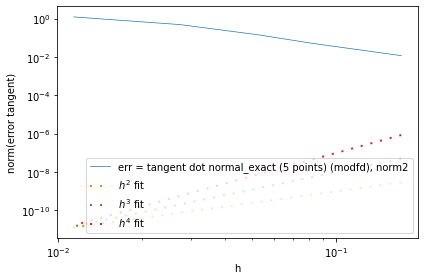

In [19]:
#4th order tangent accuracy 5 points (theta as parameter)
   
h = [];err2 = []; errinf = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    err = np.asarray(error_tangent5_(x,y))
    err2.append(norm(err))
    errinf.append(max(abs(err)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error tangent)")
ax1.loglog(h,err2, linewidth = 0.7, label = "err = tangent dot normal_exact (5 points) (modfd), norm2")

errfit = 1.0e-7*np.power(h,2)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 2., label = "$h^2$ fit")
errfit = 1.0e-5*np.power(h,3)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 2., label = "$h^3$ fit")
errfit = 1.0e-3*np.power(h,4)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 2., label = "$h^4$ fit")

#ax1.set_ylim(bottom=1e-16, top=1e-4);

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

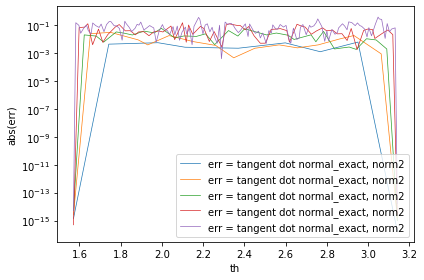

In [20]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("th")
ax1.set_ylabel("abs(err)")
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    err = np.asarray(error_tangent5_(x,y))
    ax1.semilogy(th ,abs(err), linewidth = 0.7, label = "err = tangent dot normal_exact, norm2")
    
ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    


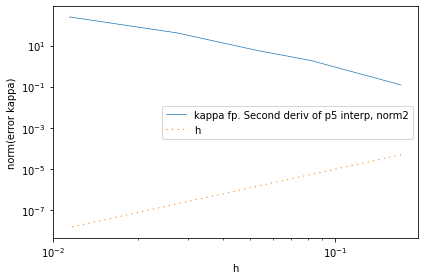

In [21]:
#kappa
h = []
err2 = []; errinf = []
err2_ = []; errinf_ = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    err = error_kappa(kappa_theta_vector(xb,yb))
    err2.append(norm(err))
    errinf.append(max(abs(err)))
    #err = error_kappa(kappa_theta2_vector(th))
    #err2_.append(norm(err))
    #errinf_.append(max(abs(err)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2, linewidth = 0.7, label = "kappa fp. Second deriv of p5 interp, norm2")
#ax1.loglog(h,err2_, linewidth = 0.7, label = "kappa fp. Hermite interpoln of tgt, norm2")


errfit = 1.0e-2*np.power(h,3)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "h")

ax1.legend(loc = "center right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

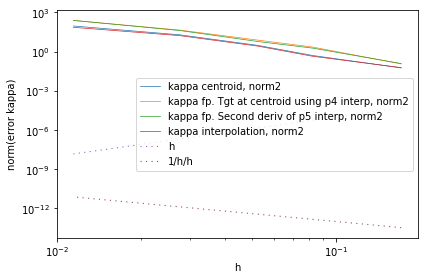

In [22]:
#kappa
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_interp = []; errinf_interp = []
err2_5p = []; errinf_5p = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    thetac, kappavc = kappa_centroid_vector(xb,yb)
    err2_centroid.append(norm(error_kappa(kappavc)))
    errinf_centroid.append(max(abs(error_kappa(kappavc))))
    kappav = kappa_theta_vector(xb,yb)
    err2_5p.append(norm(error_kappa(kappav)))
    errinf_5p.append(max(abs(error_kappa(kappav))))
    kappav = kappa_vector(xb,yb)
    err2_fp.append(norm(error_kappa(kappav)))
    errinf_fp.append(max(abs(error_kappa(kappav))))
    kappa_4 = kappa_interpolation_vector(xb,yb)
    err2_interp.append(norm(error_kappa(kappa_4)))
    errinf_interp.append(max(abs(error_kappa(kappa_4))))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "kappa centroid, norm2")
# ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "kappa centroid, norminf")
ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp. Tgt at centroid using p4 interp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
ax1.loglog(h,err2_5p, linewidth = 0.7, label = "kappa fp. Second deriv of p5 interp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")

errfit = 1.0e-2*np.power(h,3)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "h")
errfit = 1.0e-15*np.power(h,-2)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "1/h/h")

ax1.legend(loc = "center right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

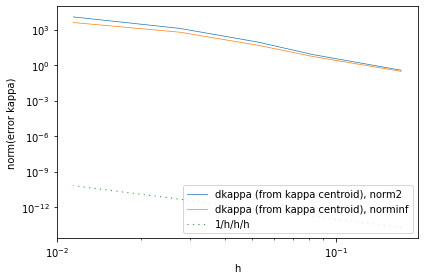

In [23]:
#derivatives (Order of accuracy)
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_interp = []; errinf_interp = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    dkappav = np.asarray(dk_ds_vector(xb,yb))
    err2_centroid.append(norm(dkappav))
    errinf_centroid.append(max(abs(dkappav)))
    h.append(Radius*np.fabs(th[1]-th[0]))


#errfit = 1.0e-8*np.power(h,2)


fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "dkappa (from kappa centroid), norm2")
ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "dkappa (from kappa centroid), norminf")
# ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
# ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")


errfit = 1.0e-14*np.power(h,-2)
errfit2 = 1.0e-16*np.power(h,-3)
# ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "1/h/h")
ax1.loglog(h,errfit2, '--',dashes=(1,4), linewidth = 1.1, label = "1/h/h/h")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    

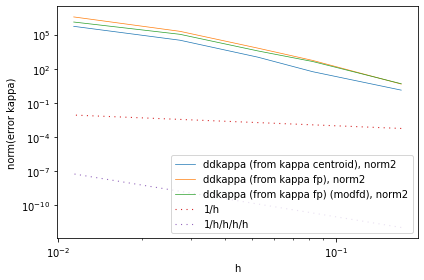

In [24]:
#derivatives (Order of accuracy)
h = [];err2_centroid = []; errinf_centroid = []
err2_fp = []; errinf_fp = []
err2_p5 = []; errinf_p5 = []
for j in range(5):
    th = theta[j]
    x = xtheta[j]; y = ytheta[j];
    xb,yb = boundary(x,y)
    ddkappav = np.asarray(ddk_dsds_theta_vector(xb,yb))
    err2_p5.append(norm(ddkappav))
    errinf_p5.append(max(abs(ddkappav)))
    ddkappav = np.asarray(ddk_dsds_vector(xb,yb))
    err2_centroid.append(norm(ddkappav))
    errinf_centroid.append(max(abs(ddkappav)))
    ddkappav = np.asarray(ddk_dsds7_vector(xb,yb))
    err2_fp.append(norm(ddkappav))
    errinf_fp.append(max(abs(ddkappav)))
    h.append(Radius*np.fabs(th[1]-th[0]))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("h")
ax1.set_ylabel("norm(error kappa)")
ax1.loglog(h,err2_centroid, linewidth = 0.7, label = "ddkappa (from kappa centroid), norm2")
# ax1.loglog(h,errinf_centroid, linewidth = 0.7, label = "ddkappa (from kappa centroid), norminf")
ax1.loglog(h,err2_fp, linewidth = 0.7, label = "ddkappa (from kappa fp), norm2")
ax1.loglog(h,err2_p5, linewidth = 0.7, label = "ddkappa (from kappa fp) (modfd), norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "ddkappa (from kappa fp), norminf")
# ax1.loglog(h,err2_fp, linewidth = 0.7, label = "kappa fp, norm2")
# ax1.loglog(h,errinf_fp, linewidth = 0.7, label = "kappa fp, norminf")
# ax1.loglog(h,err2_interp, linewidth = 0.7, label = "kappa interpolation, norm2")
# ax1.loglog(h,errinf_interp, linewidth = 0.7, label = "kappa interpolation, norminf")

errfit = 1.0e-4*np.power(h,-1)
errfit2 = 1.0e-15*np.power(h,-4)
ax1.loglog(h,errfit, '--',dashes=(1,4), linewidth = 1.1, label = "1/h")
ax1.loglog(h,errfit2, '--',dashes=(1,4), linewidth = 1.1, label = "1/h/h/h/h")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()    